In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from gan import GAN

Loading model.

In [2]:
gan2 = GAN(device='cpu', latent_dim=2)

In [3]:
model2 = torch.load('best_models/gan_ld2_ausio2.pth', map_location=torch.device('cpu'), weights_only=True)

gan2.generator.load_state_dict(model2['generator'])
gan2.discriminator.load_state_dict(model2['discriminator'])

print(model2['epoch'])

93


## Learning Curves

Plotting learning curves.

In [4]:
loss_g2 = np.load('best_models/loss_gan_ld2_g_ausio2.npy')
loss_d2 = np.load('best_models/loss_gan_ld2_d_ausio2.npy')

epochs2 = [i for i in range(loss_g2.shape[0])]

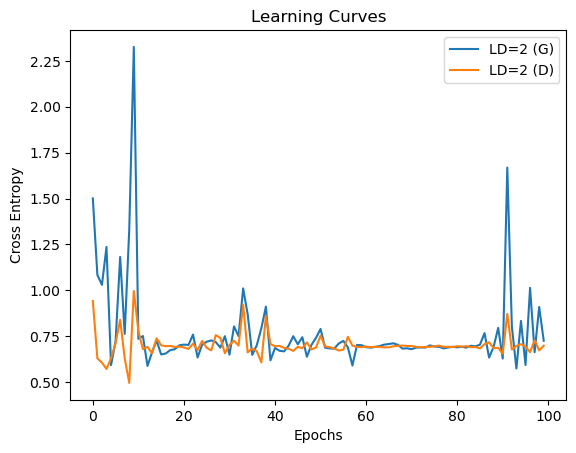

In [5]:
plt.plot(epochs2, loss_g2, label='LD=2 (G)')
plt.plot(epochs2, loss_d2, label='LD=2 (D)')

plt.ylabel('Cross Entropy')
plt.xlabel('Epochs')
plt.title('Learning Curves')
plt.legend()
plt.show()

## Model avaliation

Loading data.

In [6]:
data = np.load('tipAu_SiO2_morl.npz')['wavelets']

In [7]:
data = torch.tensor(data, dtype=torch.float32).unsqueeze(1)
data /= data.max()

Testing.

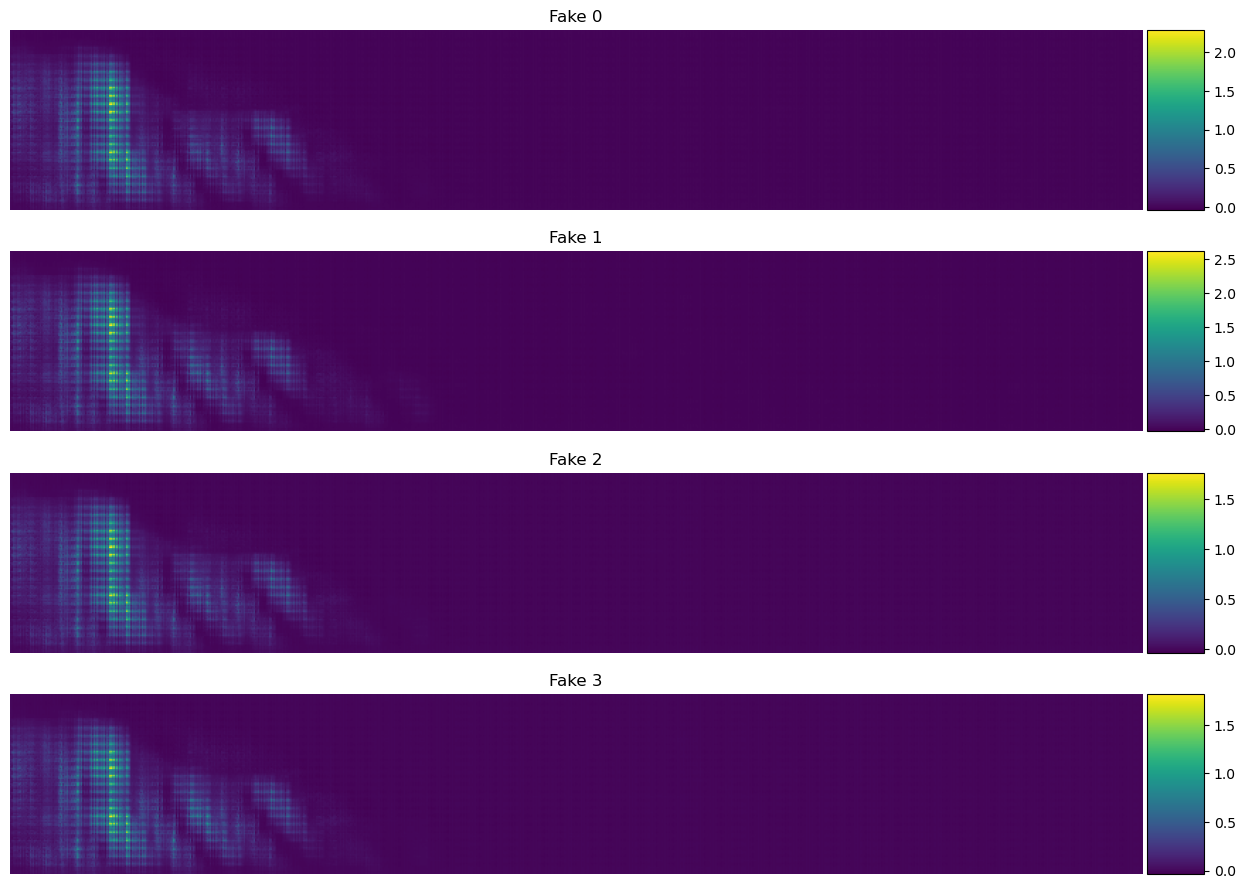

In [8]:
n_figs = 4

sample0 = torch.randn(n_figs, 2)

with torch.no_grad():
    fakes0 = gan2.generator(sample0)
    
fig, ax = plt.subplots(4, 1, figsize=(16, 9))

for i in range(n_figs):
    im0 = ax[i].imshow(fakes0[i].squeeze())
    ax[i].axis('off')
    ax[i].set_title(f'Fake {i}')
    divider = make_axes_locatable(ax[i])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im0, cax=cax)

plt.tight_layout()
plt.show()